# Histogram diagnostic - Single histogram/PDF plot

The aim of this diagnostic is to visualise the probability density function (PDF) or histogram of a certain variable over a specified region.

In this notebook we demonstrate how to:
1. Compute a histogram using the `Histogram` class
2. Plot it using the `PlotHistogram` class
3. Optionally include reference data for comparison

In [1]:
%reload_ext autoreload
%autoreload 2

## Import the classes

In [2]:
from aqua.diagnostics import Histogram
from aqua.diagnostics import PlotHistogram

/LUMI_TYKKY_gFpjXSB/miniforge/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


## Setup data dictionaries

We define:
- `dataset_dict`: Configuration for the model data
- `obs_dict`: Configuration for reference/observational data (optional)
- `common_dict`: Common parameters for both datasets

In [3]:
dataset_dict = {
    'catalog': 'climatedt-phase1',
    'model': 'ICON',
    'exp': 'historical-1990',
    'source': 'lra-r100-monthly'
}

obs_dict = {
    'catalog': 'obs',
    'model': 'ERA5',
    'exp': 'era5',
    'source': 'monthly'
}

common_dict = {
    'startdate': '1990-01-01',
    'enddate': '1999-12-31',
    'bins': 100,              # Number of bins for histogram
    'weighted': True,         # Use latitudinal weights
    'loglevel': 'INFO'
}

## Compute histograms

We create `Histogram` objects for both model and reference data.
The `run()` method:
1. Retrieves the data from the catalog
2. Computes the histogram with `density=True` to get a PDF
3. Saves the result to a netCDF file

We'll analyze `tprate` (Total Precipitation Rate) in mm/day.

In [4]:
# Create Histogram objects
hist_dataset = Histogram(**dataset_dict, **common_dict)
hist_obs = Histogram(**obs_dict, **common_dict)

# Configuration for the variable
run_dict = {
    'var': 'tprate',
    'units': 'mm/day',
    'density': True  # Get PDF instead of counts
}

# Compute histograms
hist_dataset.run(**run_dict)
hist_obs.run(**run_dict)

2025-12-29 19:15:02 :: Histogram :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-12-29 19:15:02 :: Histogram :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-12-29 19:15:02 :: Histogram :: INFO     -> Running Histogram diagnostic for tprate
2025-12-29 19:15:02 :: Histogram :: INFO     -> Retrieving data for variable tprate


2025-12-29 19:15:02 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-12-29 19:15:03 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-12-29 19:15:03 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-12-29 19:15:03 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-12-29 19:15:03 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-12-29 19:15:03 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-12-29 19:15:03 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-12-29 19:15:17 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-12-29 19:15:17 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-12-29 19:15:17 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-12-29 19:15:17 :: Regridder :: INFO    

## Plot the histogram/PDF

Now we use `PlotHistogram` to visualize the computed histograms.
We can plot:
- Single model data with reference data
- Multiple models together
- With or without reference data

2025-12-29 19:15:31 :: PlotHistogram :: INFO     -> Running PlotHistogram


2025-12-29 19:15:37 :: create_folder :: INFO     -> Folder ./png already exists
2025-12-29 19:15:37 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/histogram.pdf.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-12-29 19:15:37 :: OutputSaver :: INFO     -> Saved PNG: ./png/histogram.pdf.climatedt-phase1.ICON.historical-1990.r1.tprate.png


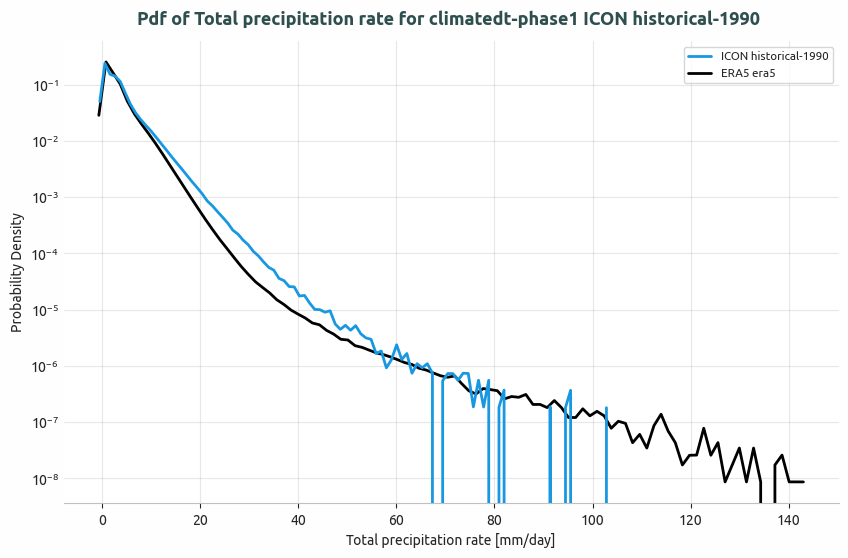

2025-12-29 19:15:37 :: PlotHistogram :: INFO     -> PlotHistogram completed successfully


In [5]:
# Setup plot with model data and reference
plot = PlotHistogram(
    data=[hist_dataset.histogram_data],  # Note: needs to be a list
    ref_data=hist_obs.histogram_data,    # Reference data
    loglevel='INFO'
)

# Generate and save the plot
plot.run(
    ylogscale=True,    # Logarithmic scale for y-axis (frequency)
    xlogscale=False,   # Linear scale for x-axis (precipitation)
    smooth=False,      # No smoothing applied
    show=True,         # Show the plot
)